# <font color = "purple">BLACK FRIDAY SALES DATA ANALYSIS</font>

## <font color="green"> LEC-1: Walkthrough </font>

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('black_friday_sales.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Description of the dataset:
1. We are having huge number of customers buying products in black friday sales.
2. Their personal details and the occupation city the products they bought etc. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
df.shape

(537577, 12)

In [8]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [4]:
del df['Product_Category_2']
del df['Product_Category_3']

In [5]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


## <font color = "green"> LEC-2 Analyzing columns </font>

In [15]:
df['User_ID'].nunique()  # nunique tells us about the number of unique items, while unique will tell us what are the user id
                        # of unique customers.

5891

In [16]:
df['Product_ID'].nunique()

3623

In [17]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [18]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [19]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [20]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [21]:
# How much total money is spent in black friday sales
df['Purchase'].sum()

5017668378

In [22]:
# How much total money is spent in black friday sales per customer.
df['Purchase'].sum()/(len(df['User_ID'].unique()))

851751.5494822611

In [25]:
# AUTOMATION OF THE PROCESS
for column in df.columns:
    print(f"{column}  Unique elements are: {df[column].nunique()}")

User_ID  Unique elements are: 5891
Product_ID  Unique elements are: 3623
Gender  Unique elements are: 2
Age  Unique elements are: 7
Occupation  Unique elements are: 21
City_Category  Unique elements are: 3
Stay_In_Current_City_Years  Unique elements are: 5
Marital_Status  Unique elements are: 2
Product_Category_1  Unique elements are: 18
Purchase  Unique elements are: 17959


## <font color = "green"> LEC-3 Analyzing Gender </font>

In [32]:
# Self done: What are the mean purchases in age groups in male and female
df_m = df[df['Gender'] == 'M']

df_f = df[df['Gender'] == 'F']
    
df_m.groupby('Age').mean()['Purchase']

df_f.groupby('Age').mean()['Purchase']

Age
0-17     8444.703210
18-25    8405.430852
26-35    8791.798654
36-45    9046.573808
46-50    8929.448740
51-55    9131.451837
55+      9119.577196
Name: Purchase, dtype: float64

In [39]:
# Define a bar chart from a naive approach - 1

data = pd.DataFrame({'ratio' :(len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F']))}, index = ['Male', 'Female'])

In [40]:
data

,ratio
Male,405380
Female,132197


<AxesSubplot:ylabel='ratio'>

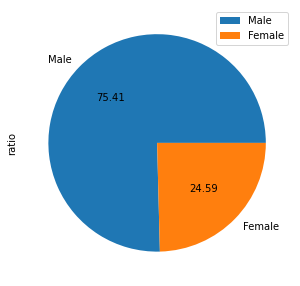

In [44]:
data.plot.pie(y='ratio', figsize=(5,5), autopct='%.2f')   # figsize used to size the figure and autopostion is used to auto pl
#                              -ace the percentages in .2f 2 decimal or many decimal places.

<AxesSubplot:title={'center':'Gender ratio'}, ylabel='None'>

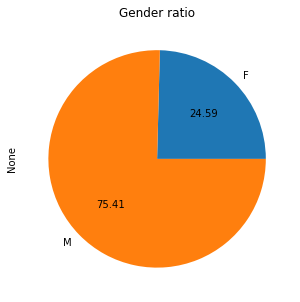

In [49]:
# APPROACH-2 
# Using the groupby function

df.groupby('Gender').size().plot(kind='pie',
                                autopct='%.2f',
                                title='Gender ratio',
                                figsize = (5,5))  # Tells us the size of both the groups

<AxesSubplot:title={'center':'Gender chart'}, xlabel='Gender'>

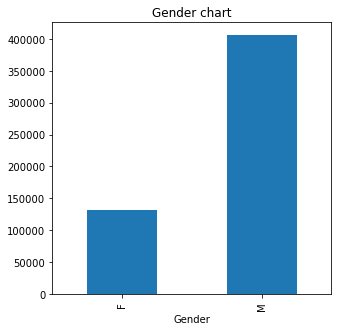

In [51]:
# Bar plot


df.groupby('Gender').size().plot(kind='bar',
                                title='Gender chart',
                                figsize = (5,5))

In [52]:
# To get to know about the total amount that male and female have spent we have to make another groupby

df.groupby('Gender').sum()['Purchase']

Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

<AxesSubplot:ylabel='Purchase'>

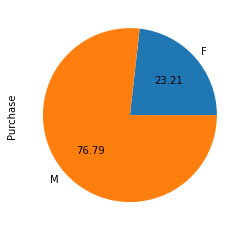

In [55]:
df.groupby('Gender').sum()['Purchase'].plot(kind='pie',
                                           autopct='%.2f')

Male to female ratio in purchase has gone down.

<AxesSubplot:ylabel='Purchase'>

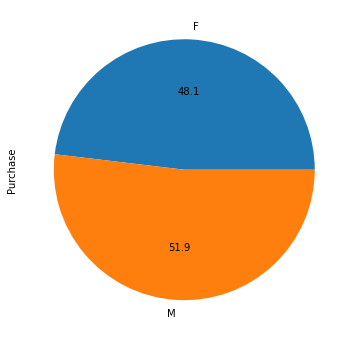

In [58]:
# How much male to female ratio has gone down in per purchase.
df.groupby('Gender').mean()['Purchase'].plot(kind='pie',
                                             autopct='%.1f',
                                            figsize=(6,6))

## <font color = "green"> LEC-4 Analyzing Age and marital status </font>

<AxesSubplot:title={'center':'Purchase distribution by age'}, xlabel='Age'>

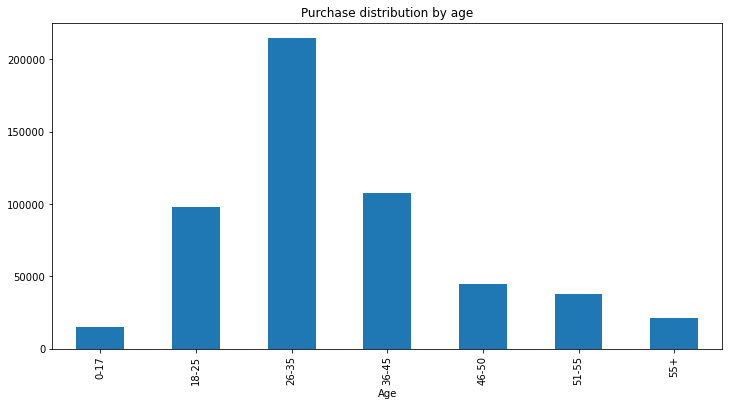

In [19]:
df.groupby('Age').size().plot(kind='bar',
                             figsize=(12,6),
                             title='Purchase distribution by age')

In [23]:
#  For automation of how many products are there in the age groups

for i in df['Age'].unique():
    print(f"{i}:  {len(df[df['Age']==i])}")

0-17:  14707
55+:  20903
26-35:  214690
46-50:  44526
51-55:  37618
36-45:  107499
18-25:  97634


In [27]:
# How many unique products are there in a particular range:

print("These are the unique product purchased in all the age groups: ")
for i in df['Age'].unique():
    print(f"{i}:  {df[df['Age']==i]['Product_ID'].nunique()}")
# df[df['Age']==i]['Product_ID'].nunique()

These are the unique product purchased in all the age groups: 
0-17:  2300
55+:  2573
26-35:  3419
46-50:  3099
51-55:  2877
36-45:  3318
18-25:  3213


In [35]:
# Convert the age groups into dataframe for easy plotting of the graphs:
lst1 = []
lst2 = []

for i in df['Age'].unique():
    lst1.append(i) 
    lst2.append(df[df['Age']==i]['Product_ID'].nunique())

In [40]:
data = pd.DataFrame({'Age':lst1,
                     'Products_unique':lst2})


In [41]:
data

,Age,Products_unique
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


### **TIP: You can pass nested list in a dataframe with the columns equal to the one list size.**

<AxesSubplot:xlabel='Age'>

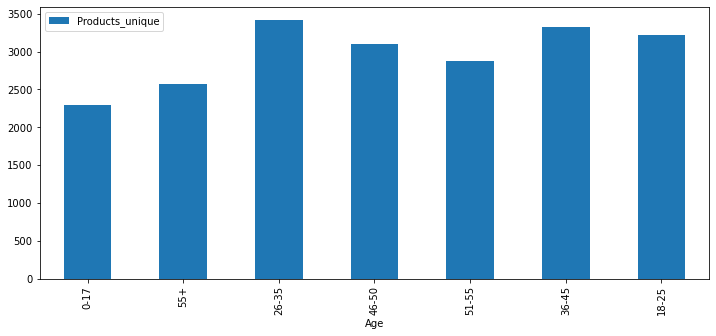

In [47]:
data.plot.bar(x='Age', figsize=(12,5))

<AxesSubplot:title={'center':'Total Amount distribution by age'}, xlabel='Age'>

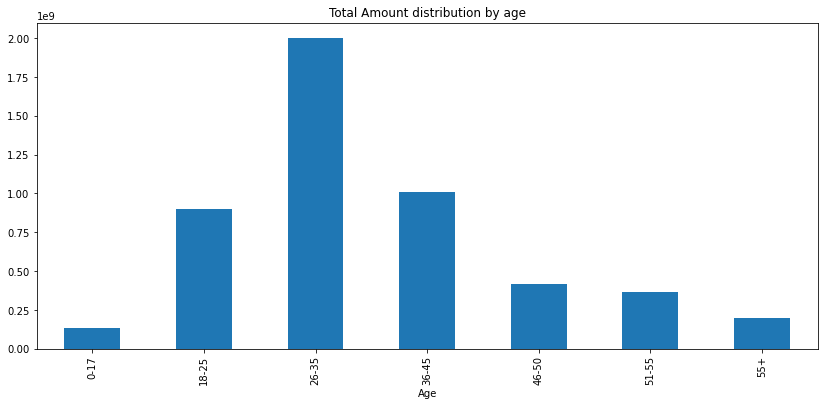

In [51]:
# Amount spend in particular age group

df.groupby('Age').sum()['Purchase'].plot(kind='bar',
                             figsize=(14,6),
                             title='Total Amount distribution by age')

<AxesSubplot:title={'center':'Average price distribution by age'}, ylabel='Purchase'>

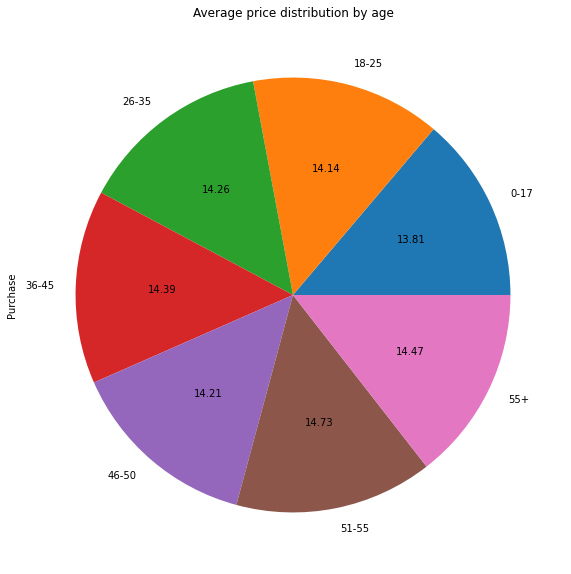

In [53]:
# Average price per product by age
df.groupby('Age').mean()['Purchase'].plot(kind='pie',
                                         autopct='%.2f',
                                         figsize=(10,10),
                                         title='Average price distribution by age')

<AxesSubplot:title={'center':'distribution by marital status'}, ylabel='None'>

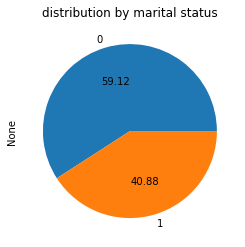

In [55]:
# Average price per product by age
df.groupby('Marital_Status').size().plot(kind='pie',
                                         autopct='%.2f',
                                         title='distribution by marital status')

## <font color = "green"> LEC-5 Multi column analysis </font>

<AxesSubplot:xlabel='Age', ylabel='count'>

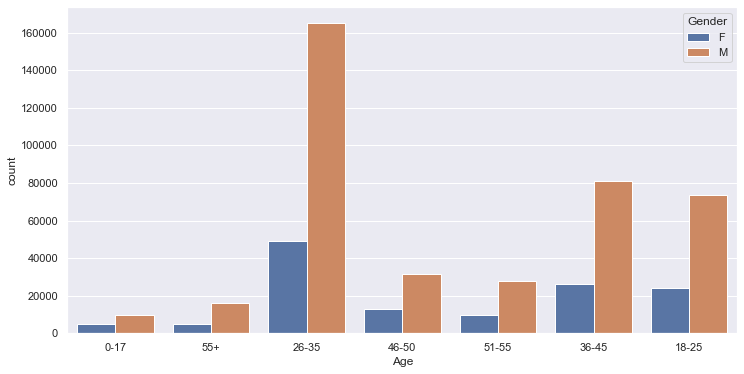

In [58]:
# Take age and gender, Based on gender we are going to analyse age.

sns.set(rc={'figure.figsize': (12,6)})
sns.countplot(x='Age' , hue='Gender' , data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

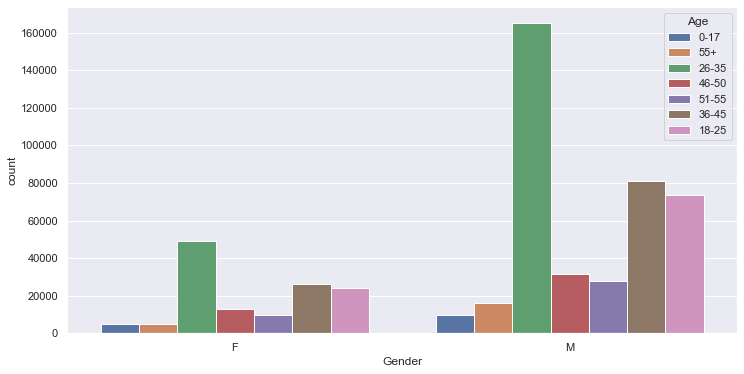

In [59]:
sns.set(rc={'figure.figsize': (12,6)})
sns.countplot(x='Gender' , hue='Age' , data=df) 

<AxesSubplot:xlabel='Gender', ylabel='count'>

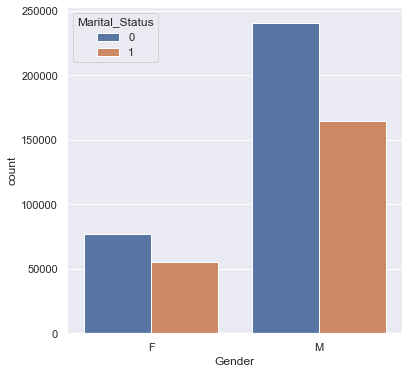

In [61]:
sns.set(rc={'figure.figsize': (6,6)})
sns.countplot(x='Gender' , hue='Marital_Status' , data=df)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

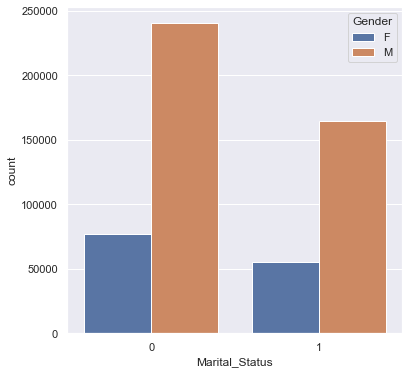

In [63]:
sns.set(rc={'figure.figsize': (6,6)})
sns.countplot(x='Marital_Status' , hue='Gender' , data=df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

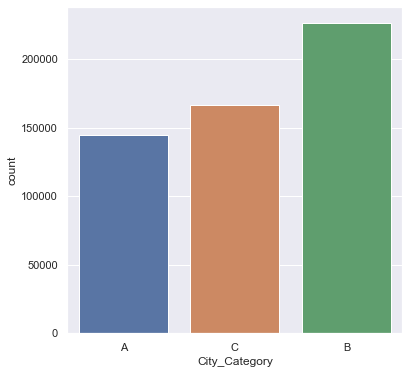

In [64]:
sns.countplot(x=df['City_Category'])

<AxesSubplot:ylabel='None'>

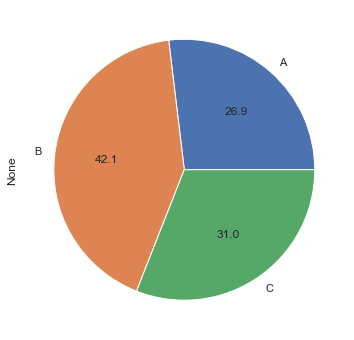

In [65]:
df.groupby('City_Category').size().plot(kind='pie',
                                       autopct='%.1f')

<AxesSubplot:xlabel='City_Category', ylabel='count'>

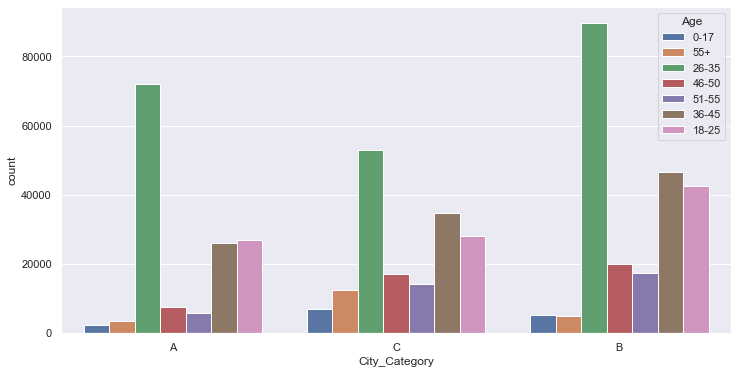

In [68]:
sns.set(rc={'figure.figsize' : (12,6)})
sns.countplot(x='City_Category', hue='Age', data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

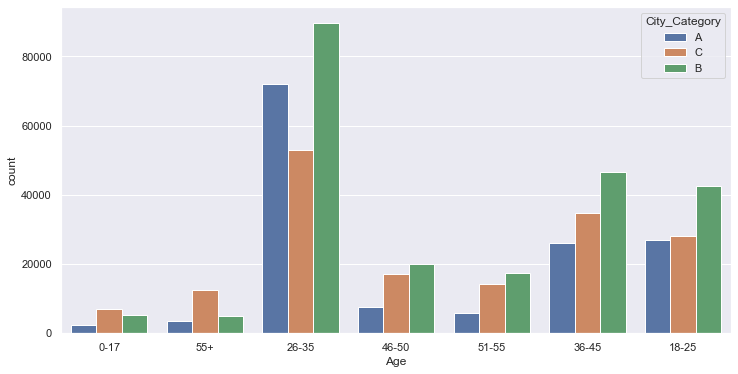

In [69]:
sns.set(rc={'figure.figsize' : (12,6)})
sns.countplot(x='Age', hue='City_Category', data=df)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

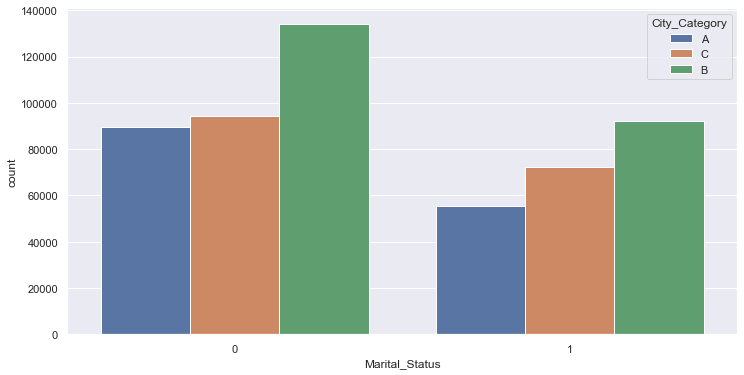

In [71]:
sns.set(rc={'figure.figsize' : (12,6)})
sns.countplot(x='Marital_Status', hue='City_Category', data=df)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

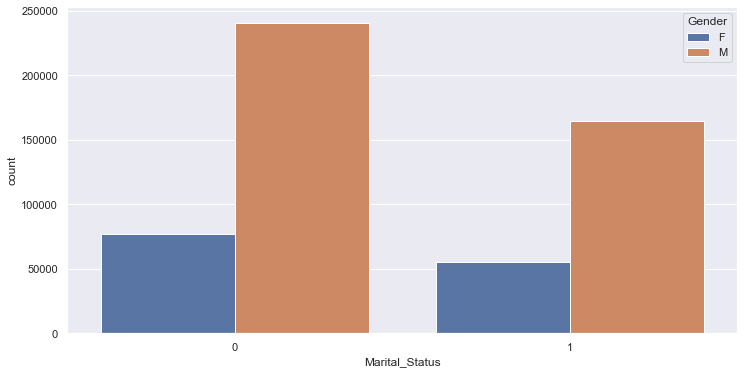

In [72]:
# M0, M1, F0, F1: Male but marrie and female but married which are tend to buy more of the products.

sns.countplot(x='Marital_Status', hue='Gender', data=df)

Conclusion: 
1. Unmarried males are buying more than married males
2. Unmarried females are also buying more than married females.
3. The purchasing power of unmarried people are more than married people. 

Reasons:
1. The reason can be the married people wants thing for their family as in whole while the unmarried people wants for their
1. individual.


    

<AxesSubplot:xlabel='Gender', ylabel='count'>

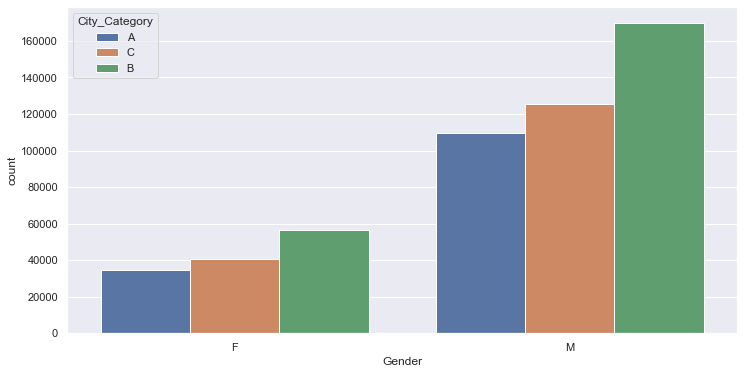

In [73]:
sns.countplot(x='Gender', hue='City_Category', data=df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

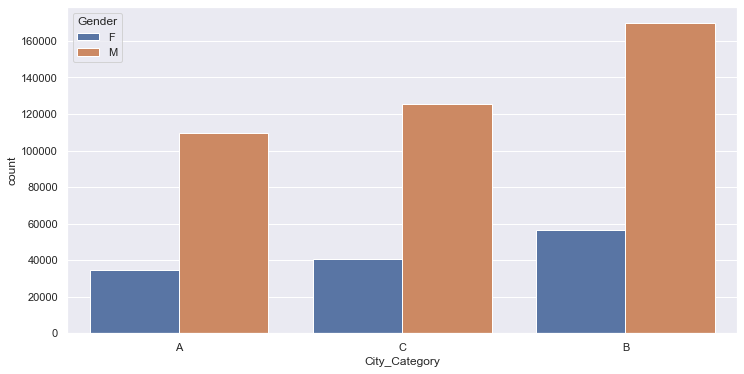

In [74]:
sns.countplot(x='City_Category', hue='Gender', data=df)

Conclusion:
1. Highest females are from B city and are purchasing more.
2. Highest purchasing power is of city B.

<AxesSubplot:ylabel='Purchase'>

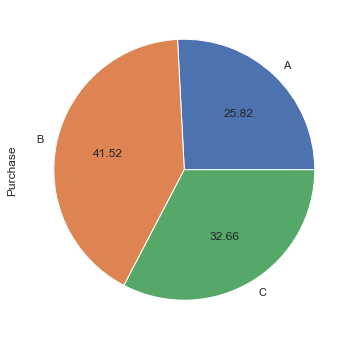

In [76]:
# Amount spent by city category

df.groupby('City_Category').sum()['Purchase'].plot(kind='pie',
                                                  autopct='%0.2f')

<AxesSubplot:ylabel='Purchase'>

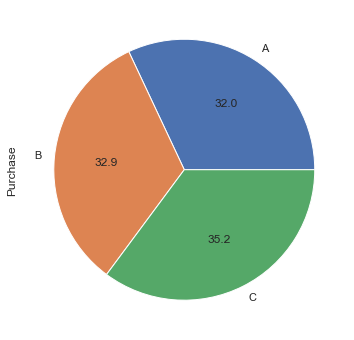

In [81]:
df.groupby('City_Category').mean()['Purchase'].plot(kind='pie',
                                                    autopct='%0.1f')

Conclusion: 
1. **The purhcasing power of city A and B are almost the same but revenue generated by b is the most,  while in contrast**
2. **The purhcasing power of city C is the highest as the people are having more average for products.**

## <font color = "green"> LEC-6 Occuptaion and product analysis </font>

In [82]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

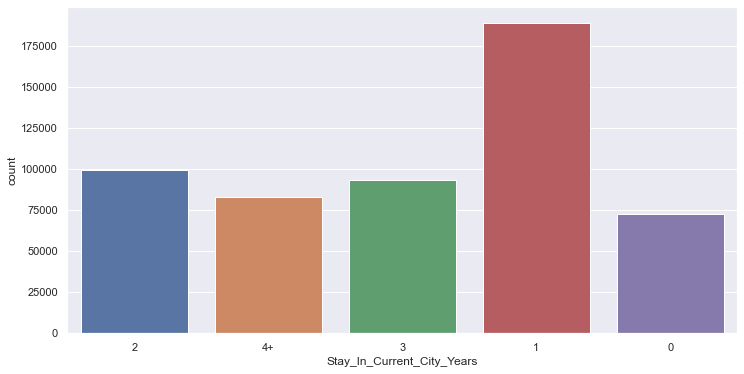

In [88]:
sns.countplot(x = df['Stay_In_Current_City_Years'])

<AxesSubplot:ylabel='None'>

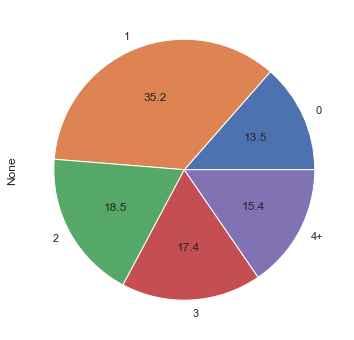

In [89]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind='pie', 
                                                    autopct='%.1f')

Conclusion: Most number of people buying from black friday sales are staying in the city for around one year.

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

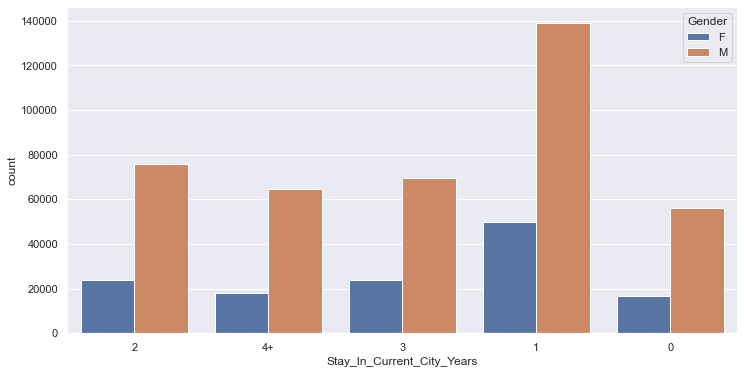

In [84]:
sns.countplot(x=df['Stay_In_Current_City_Years'], hue=df['Gender'])

**Conclusion: Target the males who are living in the city for only one year.**

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

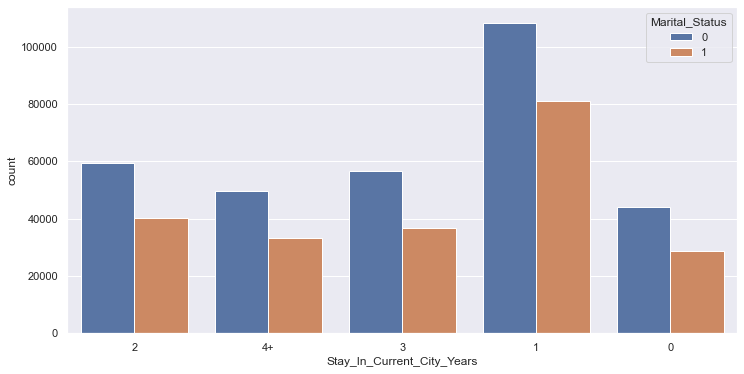

In [85]:
sns.countplot(x=df['Stay_In_Current_City_Years'], hue=df['Marital_Status'])

**Conclusion: Target the males who are living in the city for one year and are unmarried**

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

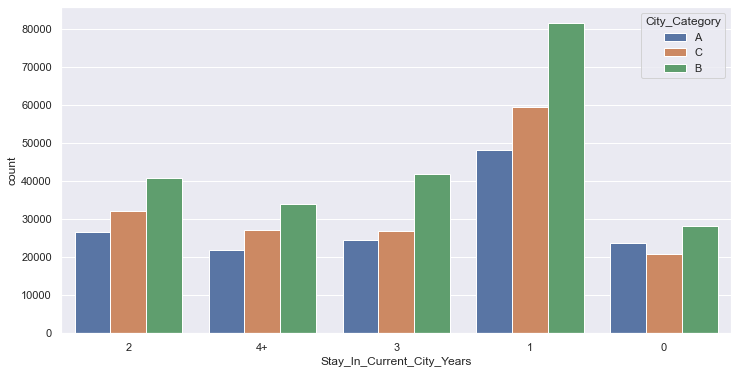

In [86]:
sns.countplot(x='Stay_In_Current_City_Years', hue='City_Category', data=df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

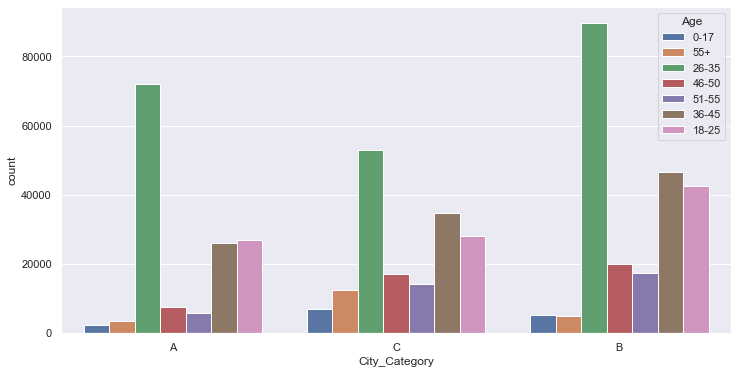

In [87]:
sns.countplot(x='City_Category', hue='Age', data=df)

**Conclusion: We can targeet unmarried males in the age bracket of 26-35 who are unmarried amd live in the city B.**

<AxesSubplot:xlabel='Occupation', ylabel='count'>

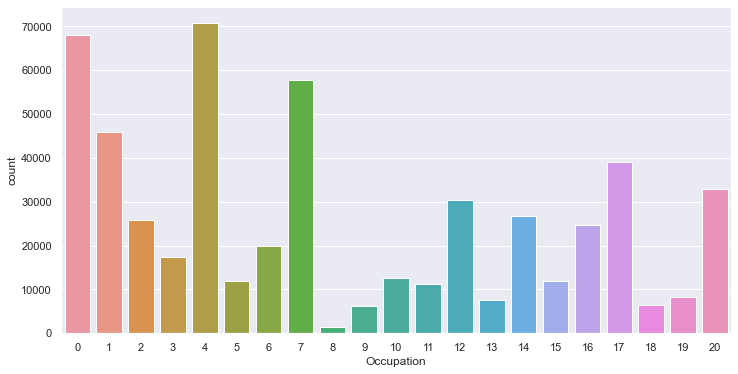

In [92]:
sns.countplot(x= df['Occupation'])

**People with occupation 4 and 0 are buying more.**

<AxesSubplot:xlabel='Occupation'>

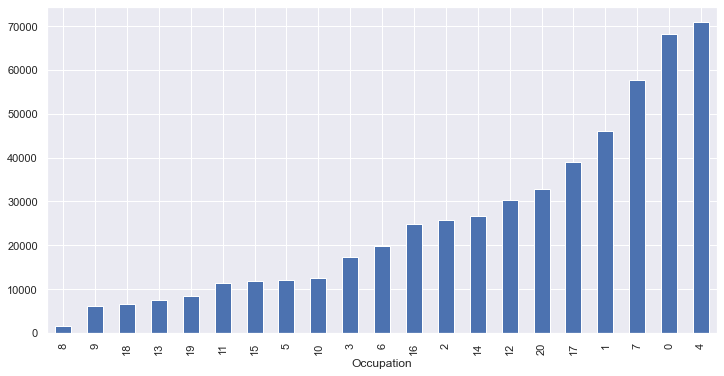

In [94]:
df.groupby('Occupation').size().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Occupation'>

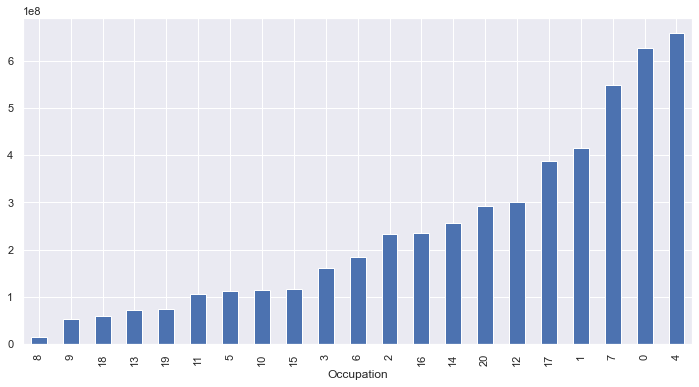

In [95]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Occupation'>

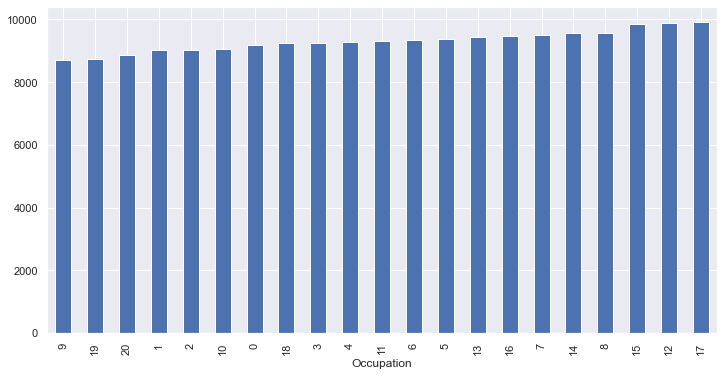

In [96]:
df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind='bar')

**Group17 occupation people are buying with the highest average purhcase, that means buying the expensive products and 
0 and 4 are buying the below expensive products**

<AxesSubplot:xlabel='Occupation', ylabel='count'>

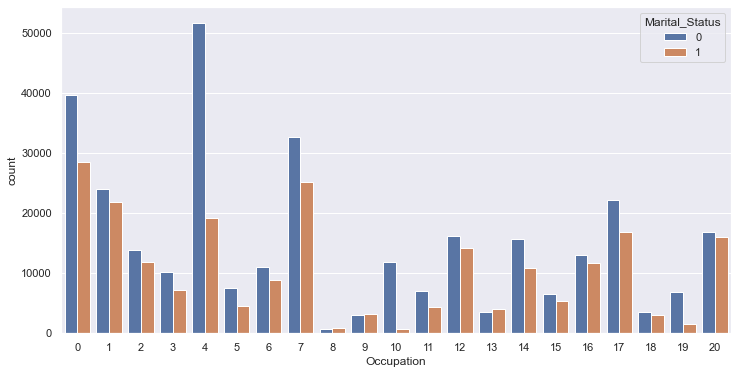

In [99]:
sns.countplot(x=df['Occupation'], hue=df['Marital_Status'])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

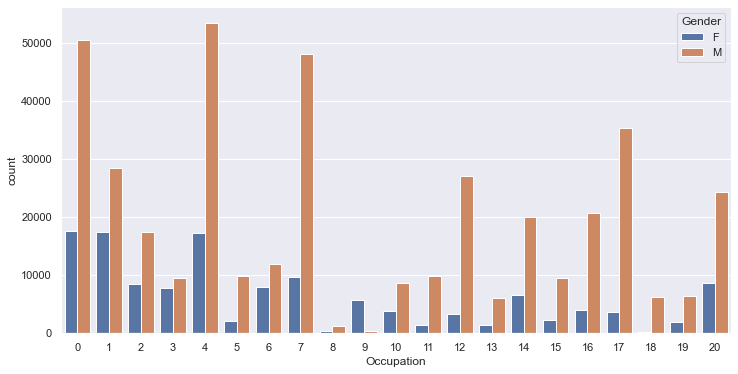

In [100]:
sns.countplot(x=df['Occupation'], hue=df['Gender'])

**In job occupation 9 there are more female buyers than male in black friday sales**

<AxesSubplot:xlabel='Occupation'>

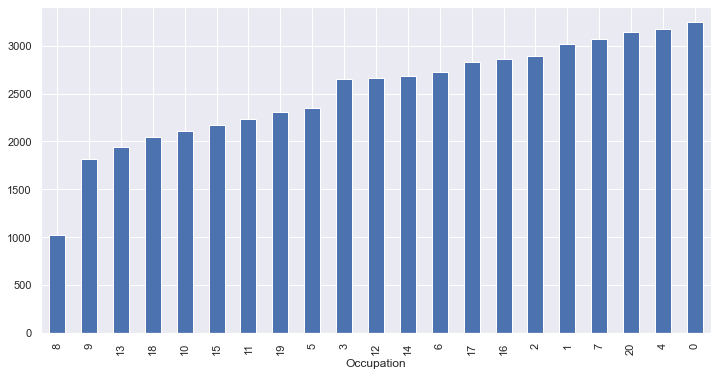

In [104]:
# How many unique products people are buying from occupations.

df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind='bar')

In [106]:
df.groupby('Product_Category_1').size().sort_values()

Product_Category_1
9        404
17       567
14      1500
18      3075
7       3668
12      3875
10      5032
13      5440
15      6203
16      9697
4      11567
3      19849
6      20164
2      23499
11     23960
8     112132
1     138353
5     148592
dtype: int64

Product category 9 are least brought while product category 5 are highest brought by the customers.

<AxesSubplot:xlabel='Product_Category_1'>

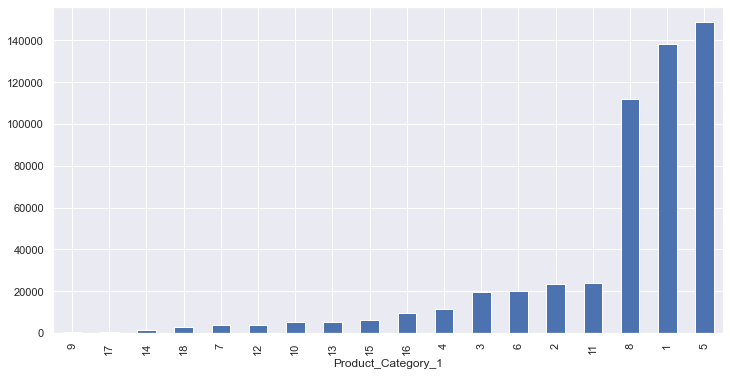

In [107]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Product_Category_1'>

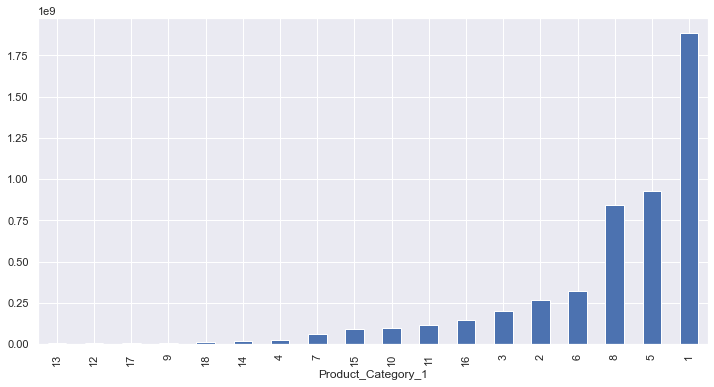

In [109]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind='bar')

Product category 1 is generating the highest revenue but product category 5 sales are more in terms of number.

<AxesSubplot:xlabel='Product_Category_1'>

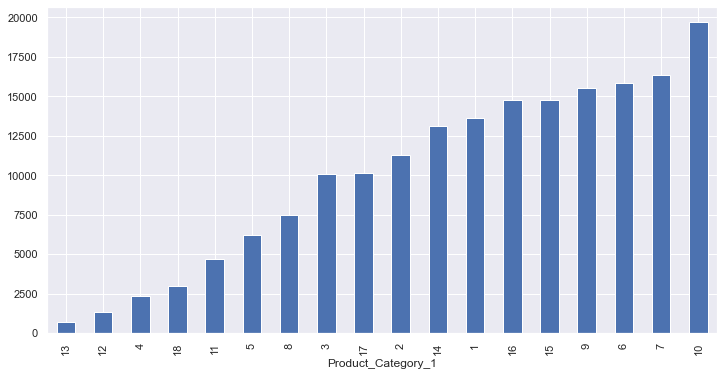

In [111]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Product_ID'>

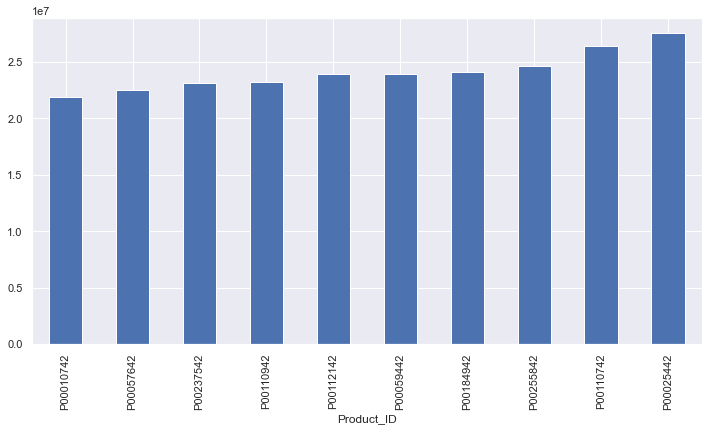

In [113]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Product_ID'>

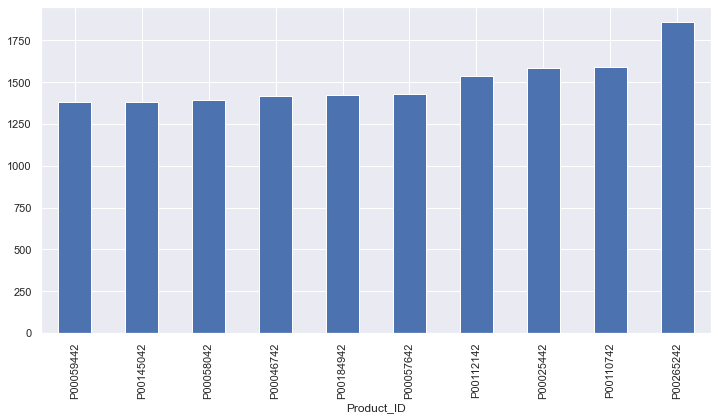

In [117]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind='bar')

These are the most revenue generating products.

<AxesSubplot:xlabel='Product_ID'>

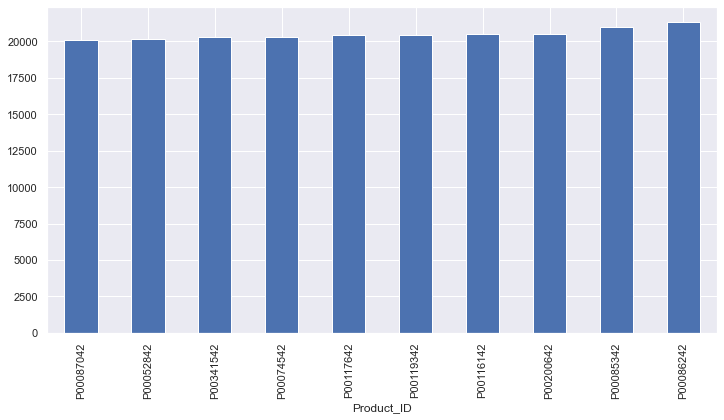

In [116]:
df.groupby('Product_ID').mean()['Purchase'].nlargest(10).sort_values().plot(kind='bar')

2442 products purchases are creating more revenue but the 242 are more expensive per product.

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

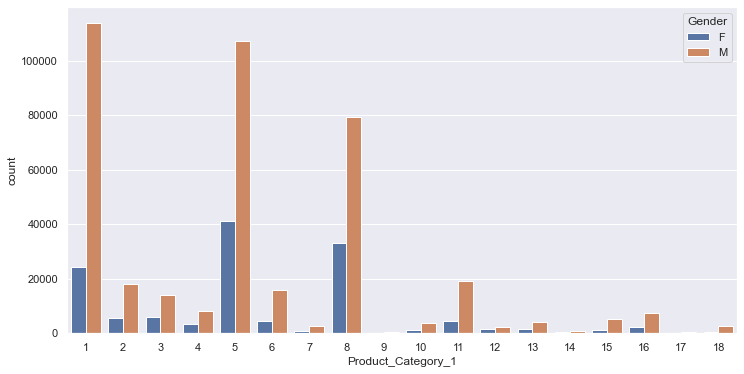

In [118]:
sns.countplot(x=df['Product_Category_1'], hue=df['Gender'])

Product category 1 5 and 8 is there where people have most spent there money.

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

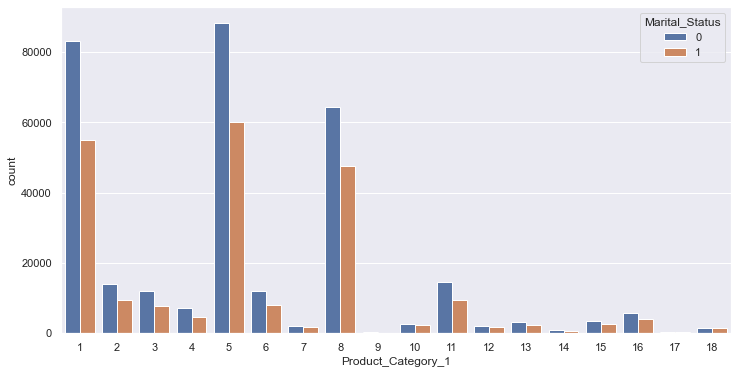

In [119]:
sns.countplot(x=df['Product_Category_1'], hue=df['Marital_Status'])

Unmarried and married people have also spent the most in this category only.

## <font color = "green"> LEC-7 Combining gender and marital status </font>

In [120]:
# Make four permutation categories based on marital status and gender.

In [123]:
l =[]
for i in range(len(df)):
    l.append(df['Gender'][i]+ "_" + str(df['Marital_Status'][i]))
    

In [125]:
len(l)

537577

In [126]:
df['MaritalGender'] = l

In [127]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<AxesSubplot:xlabel='MaritalGender', ylabel='count'>

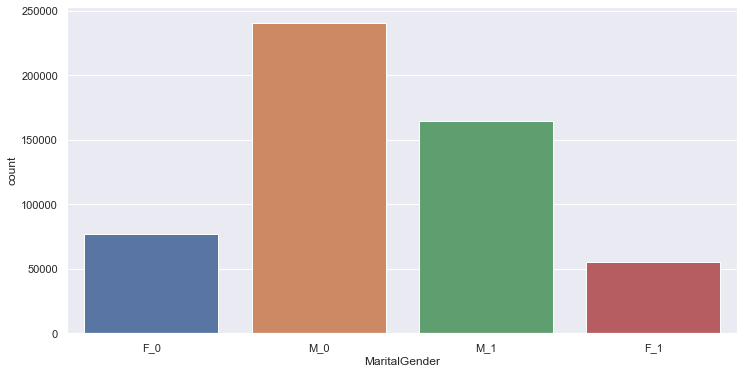

In [128]:
sns.countplot(x=df['MaritalGender'])

<AxesSubplot:xlabel='Age', ylabel='count'>

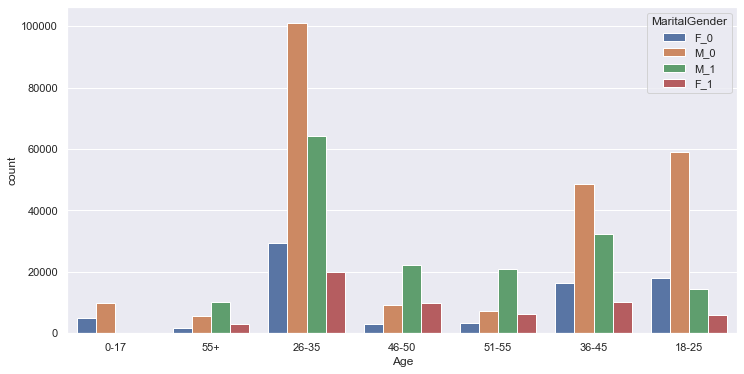

In [129]:
sns.countplot(x=df['Age'], hue=df['MaritalGender'])

Conclusion:

1. In the age group of 55+ the male married are buying more but in the age group of 26-35 male unmarried are buying more.


<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

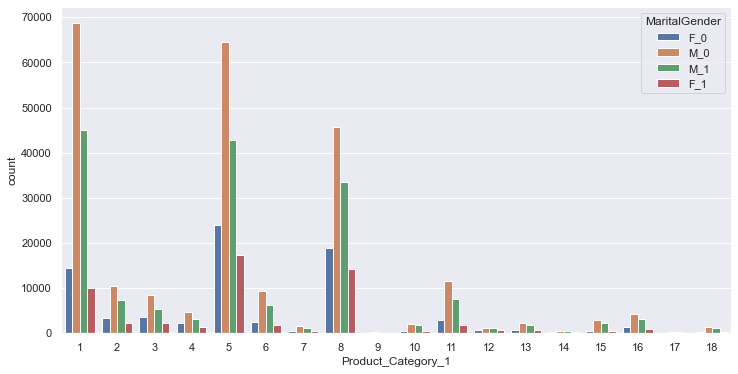

In [130]:
sns.countplot(x=df['Product_Category_1'], hue=df['MaritalGender'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

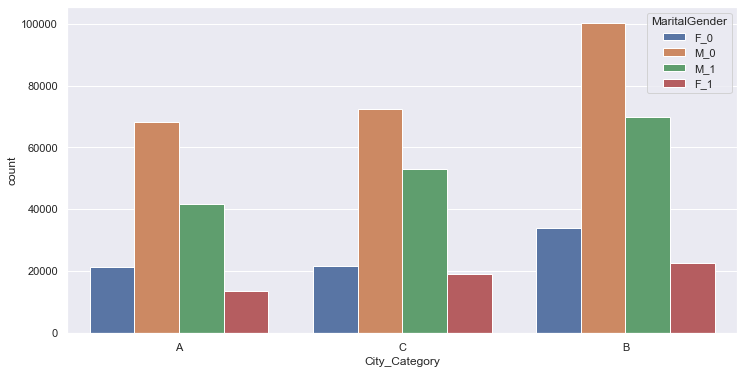

In [131]:
sns.countplot(x=df['City_Category'], hue=df['MaritalGender'])

Rather than analysisg two columns you can make one integrated columns to analyse at the same time.

# -x-x-x-x-x-x-The end-x-x-x-x-x-x-